# Data Exploration

In this notebook describe your data exploration steps.

## Install dependencies

In [22]:
%pip install pandas
%pip install geopandas
%pip install matplotlib
%pip install contextily
%pip install 'SQLAlchemy==1.4.46'

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


## Load data

In [23]:
import pandas as pd
import geopandas as gpd

df = pd.read_sql_table('tirol', 'sqlite:///project/data/tirol.sqlite')

gdf = gpd.read_file('project/data/hamburg.sqlite', driver='SQLite', spatialite=True, layer='hamburg')

### Look at the first rows

In [24]:
df.head(10)

,16 Zell-Achensee,longitude,altitude,01 Steeg-Weissenbach,02 Weissenbach-Tannheim,03 Tannheim-Reutte,04 Weissenbach-Reutte,05 Reutte-Ehrwald,06 Ehrwald-Scharnitz,07 Scharnitz-Achensee,...,M2 Leutasch-Ehrwald,M3 Ehrwald-Imst,BTT-Samnaun Rundtour gesamt,S1 Serfaus-Kappl,S2 Kappl-Heidelberger Huette,S3 Heidelberger Huette-Nauders,S4 Nauders-Serfaus,Z1 Imst-Reutte,Z2 Reutte-Seefeld,Z3 Seefeld-Imst
0,47.234580,11.880432,588.768125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,47.235226,11.881582,580.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,47.235791,11.882604,580.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,47.236109,11.883364,598.418521,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,47.236568,11.884133,589.650301,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,47.236909,11.885101,580.720182,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,47.237416,11.886202,588.024730,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,47.238229,11.887444,614.777336,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,47.238737,11.888463,580.219388,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,47.239171,11.889106,586.468005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Look at the first rows of hamburg trails

In [25]:
gdf.head()

,id,routentyp,status,richtung,routenname,group_,routennummer,verlauf,routeninformation,length,geometry
0,DE.HH.UP_FREIZEITROUTE1_1,Freizeitrouten,Nebenroute,Hin- und Rückweg,Alster,1_Nebenroute,1.0,City - Duvenstedter Brook,City - Alster - Wohldorfer Wald - Duvenstedter...,21606.351932,"LINESTRING (10.17680 53.73643, 10.17756 53.735..."
1,DE.HH.UP_FREIZEITROUTE1_2,Freizeitrouten,Hauptroute,Hin- und Rückweg,Alster,1_Hauptroute,1.0,City - Duvenstedter Brook,City - Alster - Wohldorfer Wald - Duvenstedter...,8784.855563,"LINESTRING (10.01731 53.61464, 10.01640 53.614..."
2,DE.HH.UP_FREIZEITROUTE1_3,Freizeitrouten,Hauptroute,Hinweg,Alster,1_Hauptroute_Hinweg,1.0,City - Duvenstedter Brook,City - Alster - Wohldorfer Wald - Duvenstedter...,846.935208,"LINESTRING (10.02705 53.61928, 10.02679 53.619..."
3,DE.HH.UP_FREIZEITROUTE1_4,Freizeitrouten,Nebenroute,Hin- und Rückweg,Alster,1_Nebenroute,1.0,City - Duvenstedter Brook,City - Alster - Wohldorfer Wald - Duvenstedter...,8784.855563,"LINESTRING (10.01731 53.61464, 10.01640 53.614..."
4,DE.HH.UP_FREIZEITROUTE1_5,Freizeitrouten,Nebenroute,Hinweg,Alster,1_Nebenroute_Hinweg,1.0,City - Duvenstedter Brook,City - Alster - Wohldorfer Wald - Duvenstedter...,846.935208,"LINESTRING (10.02705 53.61928, 10.02679 53.619..."


### Create a nice plot of the data

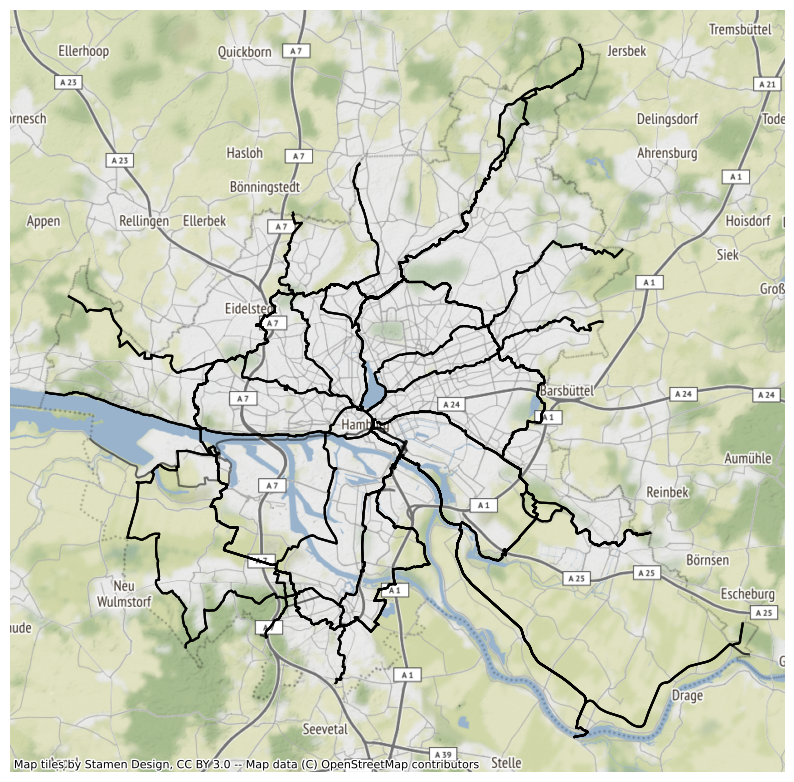

In [26]:
import contextily as cx

gdf_wm = gdf.to_crs(epsg=3857)
ax = gdf_wm.plot(figsize=(10, 10), alpha=0.5, edgecolor="k")
cx.add_basemap(ax)
ax.set_axis_off()

### Data exploration
Print some basic information about the data. Your data exploration would continue here.

In [28]:
df.info()

df['altitude'].unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73728 entries, 0 to 73727
Data columns (total 67 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   16 Zell-Achensee                1095 non-null   float64       
 1   longitude                       73728 non-null  float64       
 2   altitude                        72552 non-null  float64       
 3   01 Steeg-Weissenbach            1197 non-null   float64       
 4   02 Weissenbach-Tannheim         609 non-null    float64       
 5   03 Tannheim-Reutte              1593 non-null   float64       
 6   04 Weissenbach-Reutte           297 non-null    float64       
 7   05 Reutte-Ehrwald               615 non-null    float64       
 8   06 Ehrwald-Scharnitz            1230 non-null   float64       
 9   07 Scharnitz-Achensee           2379 non-null   float64       
 10  08 Achensee-Kaiserhaus          1998 non-null   float64       
 11  09

array([588.768125, 580.      , 598.418521, ..., 812.      , 817.7     ,
       822.      ])